In [86]:
# import things
import math
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)

train_path = './data/train.csv'
test_path = './data/test.csv'

In [48]:
class eda_data:
    def __init__(self, path):
        self.data = pd.read_csv(path)
        self.corrmat = self.data.corr()
        self.missing_data = self.get_missing()
    
    def concat_data(self, col_name):
        return pd.concat([self.data['SalePrice'], self.data[col_name]], axis=1)
    
    def scatter_plot(self, col_name):
        data = self.concat_data(col_name)
        data.plot.scatter(x=col_name, y='SalePrice', ylim=(0, 800000))
    
    def scatter_mul_plot(self, col_lst):
        sns.set()
        sns.pairplot(self.data[col_lst], size = 2.5)
        plt.show()
    
    def box_plot(self, col_name):
        data = self.concat_data(col_name)
        f, ax = plt.subplots(figsize=(16, 8))
        fig = sns.boxplot(x=col_name, y="SalePrice", data=data)
        fig.axis(ymin=0, ymax=800000);
    
    def correlation_matrix(self):
        k = 10 #number of variables for heatmap
        cols = self.corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
        cm = np.corrcoef(self.data[cols].values.T)
        sns.set(font_scale=1.25)
        hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
        plt.show()
        
    def get_missing(self):
        total = self.data.isnull().sum().sort_values(ascending=False)
        percent = (self.data.isnull().sum() / self.data.isnull().count()).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        return missing_data
        
    def check_nan(self, col_lst):
#         eda_df.data[['SalePrice']].isnull().values.any()
        for item in col_lst:
            if self.data[[item]].isnull().values.any():
                print(f"column: {item} has NaN data.")
            else:
                print(f"column: {item} is fine.")
                
eda_df = eda_data(train_path)

In [45]:
eda_df.data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
eda_df.data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

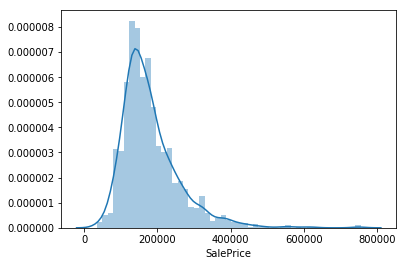

In [15]:
sns.distplot(eda_df.data['SalePrice'])

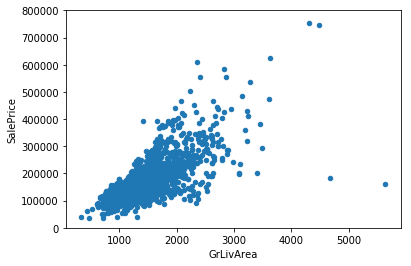

In [55]:
eda_df.scatter_plot('GrLivArea')

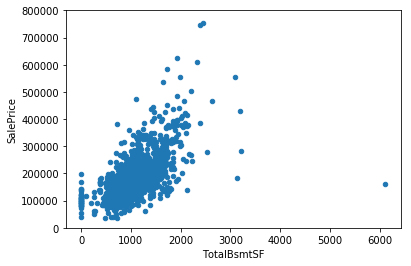

In [56]:
eda_df.scatter_plot('TotalBsmtSF')

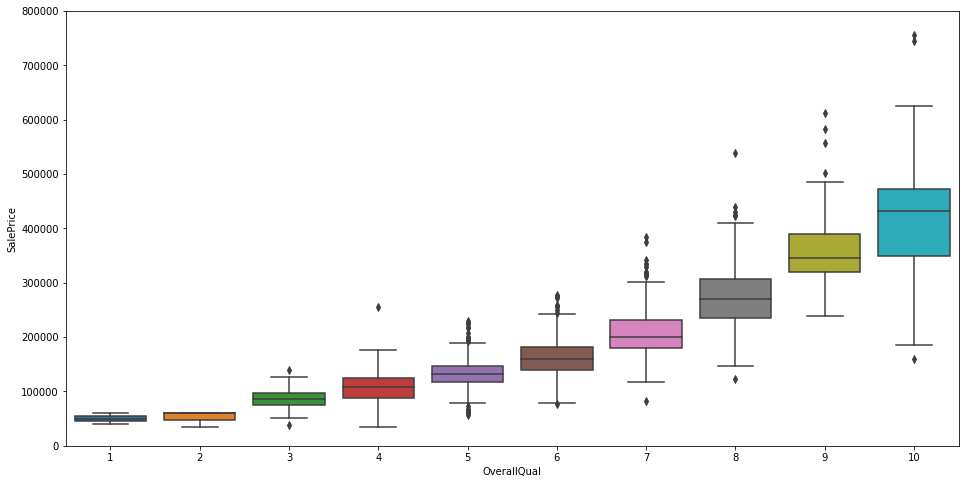

In [12]:
eda_df.box_plot('OverallQual')

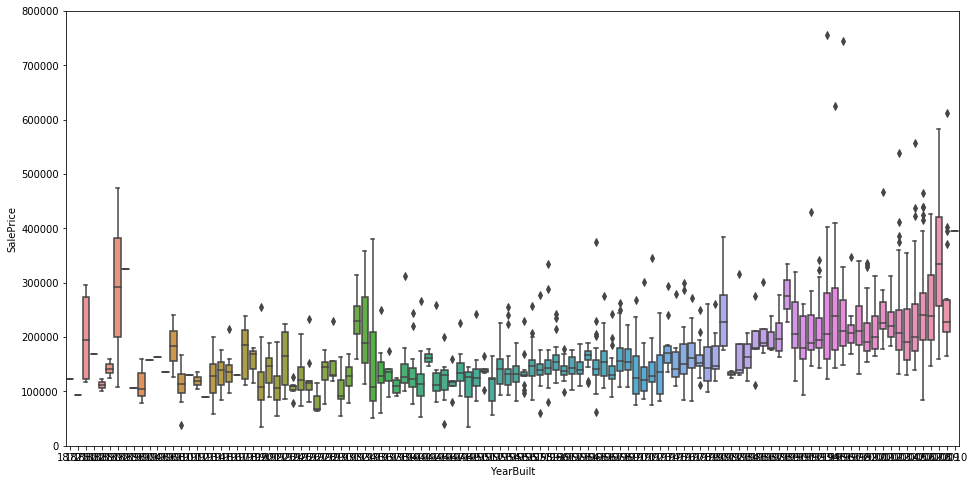

In [11]:
eda_df.box_plot('YearBuilt')

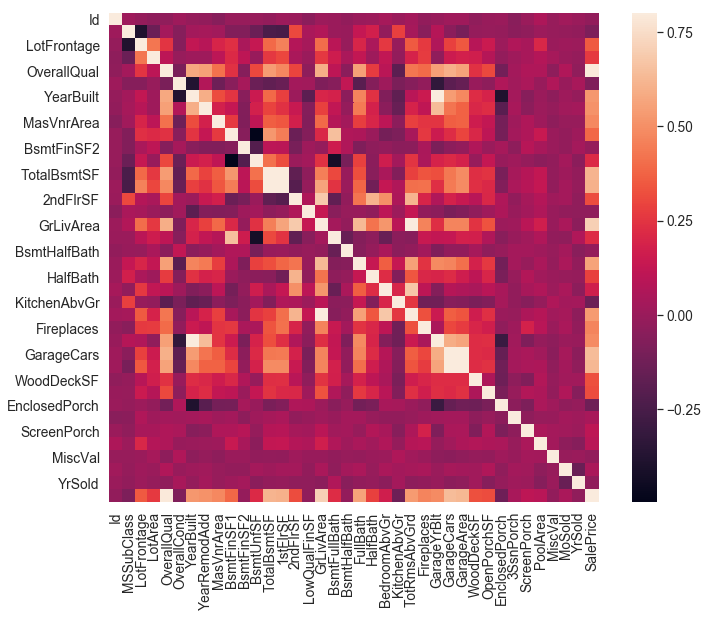

In [66]:
# eda_df.coorelation_matrix()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(eda_df.corrmat, vmax=.8, square=True)

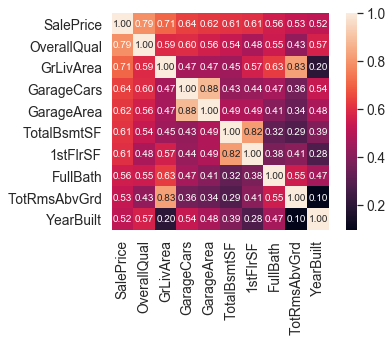

In [70]:
eda_df.correlation_matrix()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


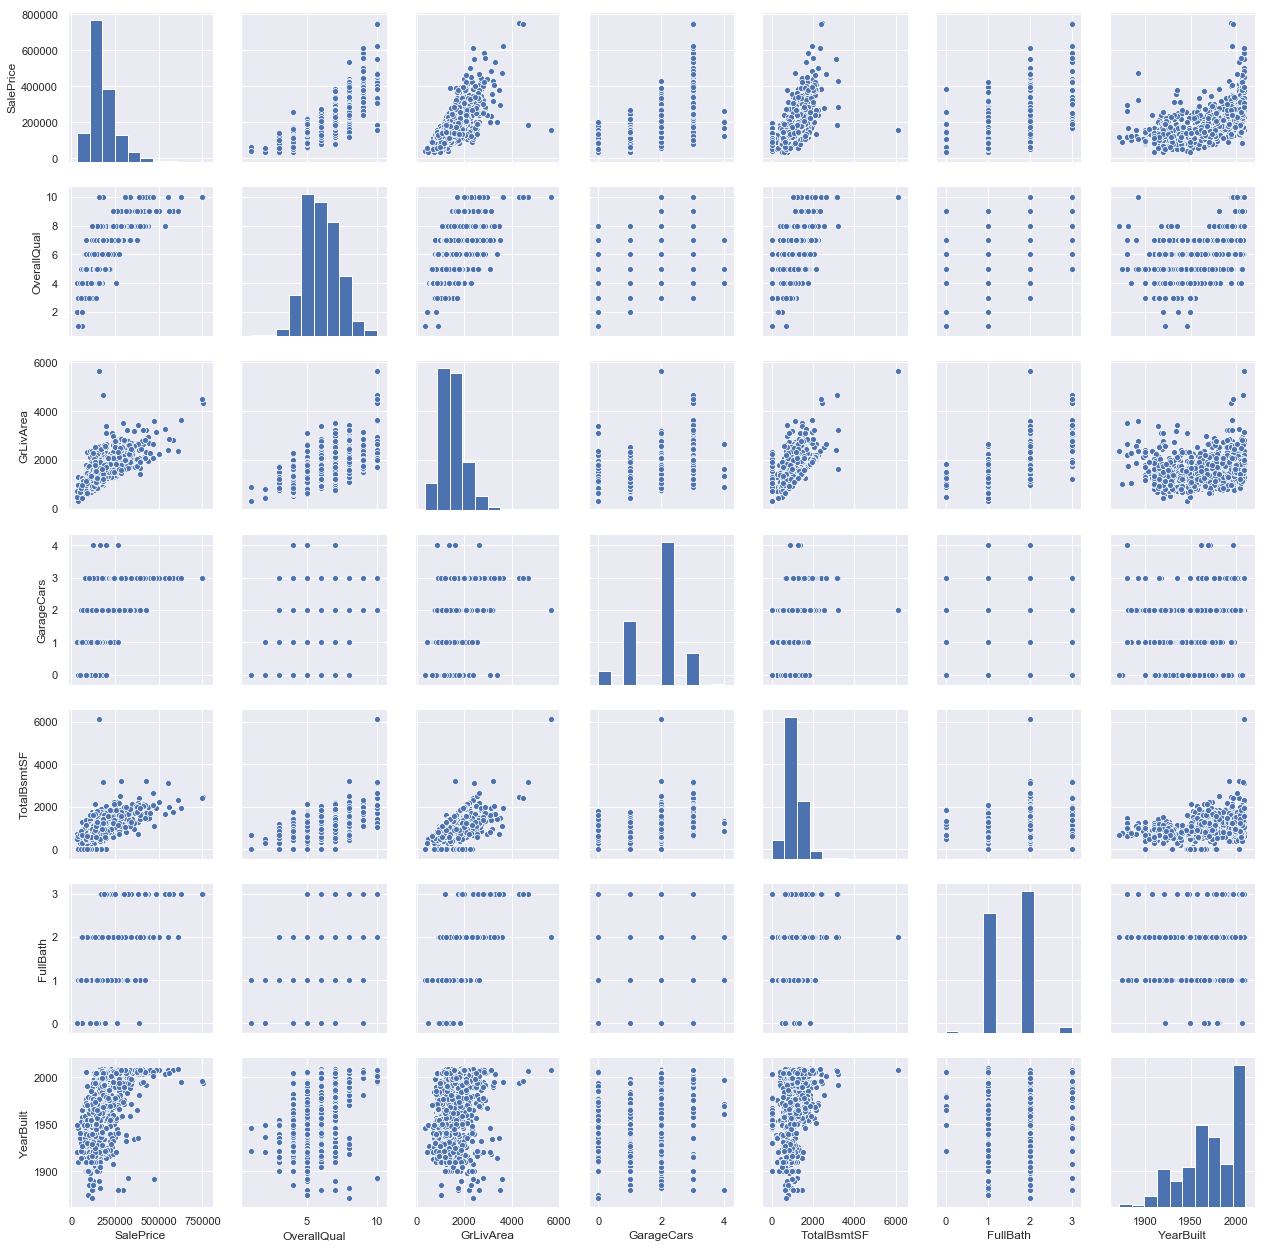

In [73]:
eda_df.scatter_mul_plot(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'])

In [38]:
eda_df.check_nan(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'])

column: SalePrice is fine.
column: OverallQual is fine.
column: GrLivArea is fine.
column: GarageCars is fine.
column: TotalBsmtSF is fine.
column: FullBath is fine.
column: YearBuilt is fine.


In [61]:
missing_df = eda_df.missing_data
missing_df.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
